In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


In [2]:
df=pd.read_csv("/content/drive/MyDrive/2022-2023 Football Player Stats.csv",encoding='ISO-8859-1', delimiter=';')

In [3]:
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,...,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,...,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4


In [4]:
print(df.shape)

(2689, 124)


In [5]:
df.describe()

,Rk,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
count,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,...,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000
mean,1345.000000,26.011157,1996.155820,11.833023,8.476013,760.451097,8.450465,1.027520,1.245787,0.411261,...,0.204697,1.661636,0.990569,0.009249,0.015173,0.003142,4.951967,1.312064,1.497356,43.583600
std,776.391761,4.446259,4.450108,6.864278,6.994383,591.094260,6.567484,2.013714,1.424619,0.754716,...,0.552376,2.319000,1.235965,0.043781,0.077399,0.022607,2.901833,1.579539,1.830391,26.673092
min,1.000000,15.000000,1981.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,673.000000,23.000000,1993.000000,5.000000,2.000000,194.000000,2.200000,0.000000,0.260000,0.000000,...,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,3.330000,0.330000,0.550000,27.600000
50%,1345.000000,26.000000,1996.000000,13.000000,7.000000,684.000000,7.600000,0.000000,0.860000,0.180000,...,0.000000,0.760000,0.830000,0.000000,0.000000,0.000000,5.000000,0.930000,1.100000,46.400000
75%,2017.000000,29.000000,2000.000000,18.000000,14.000000,1245.000000,13.800000,1.000000,1.850000,0.590000,...,0.210000,2.500000,1.320000,0.000000,0.000000,0.000000,6.270000,1.790000,1.830000,60.000000
max,2689.000000,41.000000,2007.000000,23.000000,23.000000,2070.000000,23.000000,25.000000,15.000000,10.000000,...,10.000000,30.000000,20.000000,0.870000,2.000000,0.500000,30.000000,25.000000,30.000000,100.000000


In [6]:
ds=df.drop(['Born','AerWon%','Nation'], axis=1)


In [7]:
ds["Squad"].unique()

array(['Leeds United', 'Reims', 'Angers', 'Lens', 'Lorient',
       'Hellas Verona', 'Auxerre', 'Rennes', 'Betis', 'Toulouse', 'Roma',
       'Inter', 'Nantes', 'Sevilla', 'Southampton', 'Köln', 'Fulham',
       'Dortmund', 'Leverkusen', 'Milan', 'Bologna', 'Cremonese',
       'Troyes', 'Werder Bremen', 'Valladolid', 'Spezia', 'West Ham',
       'Monaco', 'Crystal Palace', 'Stuttgart', 'Strasbourg',
       'Celta Vigo', 'Torino', 'Wolves', 'Brentford', 'Mainz 05',
       'Manchester City', 'Almería', 'Empoli', 'Hoffenheim',
       'Real Madrid', 'Cádiz', 'Eint Frankfurt', 'Barcelona', 'Lazio',
       'Villarreal', 'Leicester City', 'Liverpool', 'Getafe', 'Elche',
       'Real Sociedad', 'Clermont Foot', 'Everton', 'Valencia',
       'Newcastle Utd', 'Ajaccio', 'Schalke 04', 'Sassuolo',
       'Athletic Club', 'Mallorca', 'Sampdoria', 'Fiorentina', 'Lille',
       'Bournemouth', 'Manchester Utd', 'Monza', 'Bochum', 'Lyon',
       'Aston Villa', 'Brest', 'Wolfsburg', 'Chelsea', 'Udinese'

In [8]:
ds['Squad'].value_counts()

Cádiz              34
Schalke 04         34
Hellas Verona      34
Sevilla            33
Spezia             33
                   ..
Crystal Palace     23
Freiburg           23
Real Madrid        22
Manchester City    21
Lazio              21
Name: Squad, Length: 98, dtype: int64

In [9]:
ds.nunique()

Rk         2689
Player     2530
Pos          10
Squad        98
Comp          5
           ... 
PKcon        41
OG           20
Recov       707
AerWon      410
AerLost     402
Length: 121, dtype: int64

In [10]:
ds["Pos"].unique()

array(['MFFW', 'DF', 'MF', 'FWMF', 'FW', 'DFFW', 'MFDF', 'GK', 'DFMF',
       'FWDF'], dtype=object)

In [11]:
ds['Pos'].value_counts()

DF      825
MF      608
FW      409
FWMF    244
MFFW    208
GK      164
DFMF    101
MFDF     62
DFFW     38
FWDF     30
Name: Pos, dtype: int64

In [12]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689 entries, 0 to 2688
Columns: 121 entries, Rk to AerLost
dtypes: float64(111), int64(6), object(4)
memory usage: 2.5+ MB


In [13]:
ds.isnull().sum()

Rk         0
Player     0
Pos        0
Squad      0
Comp       0
          ..
PKcon      0
OG         0
Recov      0
AerWon     0
AerLost    0
Length: 121, dtype: int64

In [14]:
ds.dropna()
ds.head()

,Rk,Player,Pos,Squad,Comp,Age,MP,Starts,Min,90s,...,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost
0,1,Brenden Aaronson,MFFW,Leeds United,Premier League,22,20,19,1596,17.7,...,2.26,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19
1,2,Yunis Abdelhamid,DF,Reims,Ligue 1,35,22,22,1980,22.0,...,0.50,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23
2,3,Himad Abdelli,MFFW,Angers,Ligue 1,23,14,8,770,8.6,...,1.28,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05
3,4,Salis Abdul Samed,MF,Lens,Ligue 1,22,20,20,1799,20.0,...,1.35,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50
4,5,Laurent Abergel,MF,Lorient,Ligue 1,30,15,15,1165,12.9,...,1.01,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39


In [15]:
ds.dtypes

Rk           int64
Player      object
Pos         object
Squad       object
Comp        object
            ...   
PKcon      float64
OG         float64
Recov      float64
AerWon     float64
AerLost    float64
Length: 121, dtype: object

In [16]:
#Get list of categorical variables
s = (ds.dtypes == 'object')
object_cols = list(s[s].index)

object_cols

['Player', 'Pos', 'Squad', 'Comp']

In [17]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
#Label Encoding object dtypes to numeric dtypes
for i in object_cols:
    ds[i]=ds[[i]].apply(LE.fit_transform)
df.dtypes

Rk           int64
Player      object
Nation      object
Pos         object
Squad       object
            ...   
OG         float64
Recov      float64
AerWon     float64
AerLost    float64
AerWon%    float64
Length: 124, dtype: object

In [18]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit(ds)
pt.transform(ds)

array([[-2.17305274, -1.29804864,  1.38150345, ...,  0.08480942,
        -0.75636557,  0.14634059],
       [-2.1655158 ,  1.50521702, -1.32474876, ...,  0.67225244,
         0.96663016,  0.1816376 ],
       [-2.15868926, -0.37436015,  1.38150345, ...,  1.11779081,
         0.05760796,  0.01542622],
       ...,
       [ 1.55325167,  0.50206223,  0.96437939, ...,  0.19958455,
        -0.5205661 , -0.37399595],
       [ 1.55424113,  0.64423345, -0.07163033, ..., -1.05842131,
         2.76521647,  1.40801483],
       [ 1.55523049, -0.62192168,  1.38150345, ...,  0.12340408,
        -0.42932735, -0.16119387]])

In [19]:
y=ds['Pos']
X=ds.drop('Pos', axis=1)

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
def model_Evaluate(model):

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = True, cmap = 'Reds',fmt = '')

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       183
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00        19
           3       0.67      0.72      0.70        76
           4       0.00      0.00      0.00         8
           5       0.40      0.35      0.37        46
           6       1.00      1.00      1.00        29
           7       0.73      0.91      0.81       118
           8       0.00      0.00      0.00        14
           9       0.32      0.24      0.28        37

    accuracy                           0.74       538
   macro avg       0.40      0.42      0.41       538
weighted avg       0.66      0.74      0.69       538



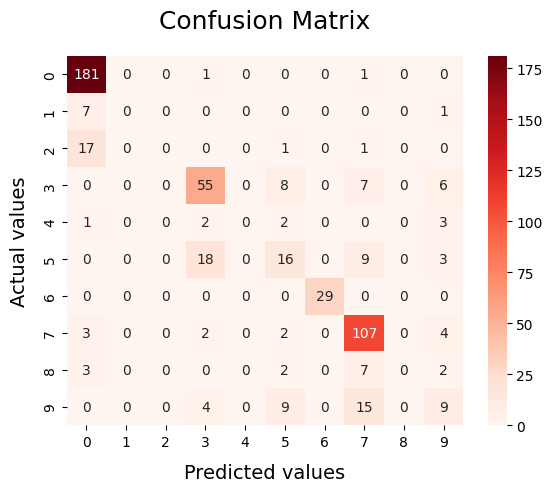

In [22]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_classifier_pred=rf_classifier.predict(X_test)
model_Evaluate(rf_classifier)


              precision    recall  f1-score   support

           0       0.87      0.98      0.92       183
           1       0.00      0.00      0.00         8
           2       0.67      0.11      0.18        19
           3       0.52      0.75      0.62        76
           4       0.00      0.00      0.00         8
           5       0.35      0.28      0.31        46
           6       0.97      0.97      0.97        29
           7       0.73      0.82      0.77       118
           8       0.00      0.00      0.00        14
           9       0.31      0.14      0.19        37

    accuracy                           0.71       538
   macro avg       0.44      0.40      0.40       538
weighted avg       0.66      0.71      0.67       538



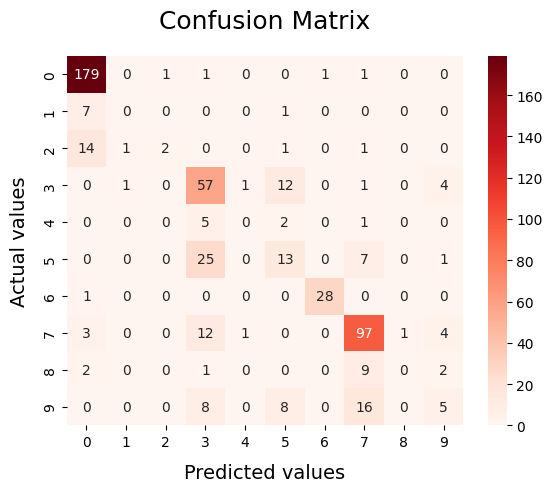

In [23]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
LRmodel_pred=LRmodel.predict(X_test)
model_Evaluate(LRmodel)

In [43]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Create an empty dictionary to store the best player scores for each team and position
team_lineups = {}

# Iterate over each team
for team in ds['Squad'].unique():
    team_lineups[team] = {}

    # Iterate over each position
    for position in ds['Pos'].unique():
        # Filter the data for the current team and position
        team_data = ds[(ds['Squad'] == team) & (ds['Pos'] == position)]

        # If there are players for the current team and position
        if not team_data.empty:
            # Separate the features and target variable
            X = team_data.drop(['Player'], axis=1)
            y = team_data['Player']

            # Train a random forest regressor
            rf_regressor = RandomForestRegressor()
            rf_regressor.fit(X, y)

            # Predict the best player score for the current position
            best_player_score = rf_regressor.predict(X)[0]

            # Store the best player score in the team_lineups dictionary
            team_lineups[team][position] = best_player_score

# Print the best lineups for each team
for team, lineup in team_lineups.items():
    print(f"Best lineup for {team}:")
    for position, player_score in lineup.items():
        print(f"{position}: Predicted Player - {player_score}")
        print()




Best lineup for 44:
9: Predicted Player - 810.17

0: Predicted Player - 1464.29

7: Predicted Player - 2023.63

5: Predicted Player - 1548.62

3: Predicted Player - 1536.84

6: Predicted Player - 948.0

Best lineup for 73:
9: Predicted Player - 1577.0

0: Predicted Player - 2016.63

7: Predicted Player - 992.84

5: Predicted Player - 1617.41

3: Predicted Player - 830.32

6: Predicted Player - 2308.0

2: Predicted Player - 115.0

4: Predicted Player - 1711.0

Best lineup for 2:
9: Predicted Player - 973.15

0: Predicted Player - 399.38

7: Predicted Player - 1760.48

5: Predicted Player - 1715.57

3: Predicted Player - 1186.73

1: Predicted Player - 2014.68

8: Predicted Player - 1630.26

6: Predicted Player - 2040.44

2: Predicted Player - 925.0

4: Predicted Player - 706.0

Best lineup for 46:
9: Predicted Player - 1388.47

0: Predicted Player - 1197.39

7: Predicted Player - 1967.0

5: Predicted Player - 852.12

3: Predicted Player - 979.89

1: Predicted Player - 966.0

6: Predicted

In [44]:
import joblib
# Save the trained model to a JSON file
joblib.dump(rf_regressor, "football_model.json")

['football_model.json']

In [45]:
import os

# Get the current working directory
current_dir = os.getcwd()

# Define the filename for the saved model
model_filename = "football_model.json"

# Construct the full file path
model_path = os.path.join(current_dir, model_filename)

# Print the file path
print("Saved model location:", model_path)

Saved model location: /content/football_model.json
